#  Random Forest

`Estimator`

This is going to be the number of trees that the algorithmm creates before averaging the predictions.

`Max_features`

Another important hyperparameter is "max_features", which Random Forest can try on a single tree.

This will be maximum number of features.

`Min_sample_leaf` 

It determines the minimum number of leaves needed to split an internal node.



### Random Forest Advantages

Random forest can be used for both regression and classification tasks.

Random forest is also considered a handy and very easy-to-use algorithm because default hyperparameters usually produce a really good prediction result.

### Random Forest Disadvantages

In a Random Forest, many trees can make the algorithm slow and kind of ineffective for real-time predictions.

In general, these algorithms can be trained quickly, but they are extremely slow to generate predictions once trained.

The Random forest algorithm is fast enough for most real-world applications.

**Importing the Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Getting to know the dataset**

In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df.drop(["Id"], axis =1, inplace = True)

In [5]:
df["Species"] = df["Species"].str.replace("Iris-", "")

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


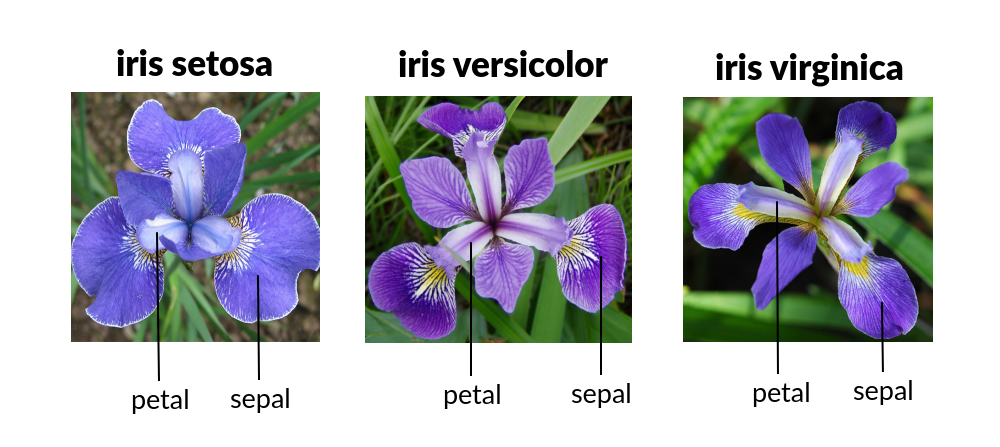

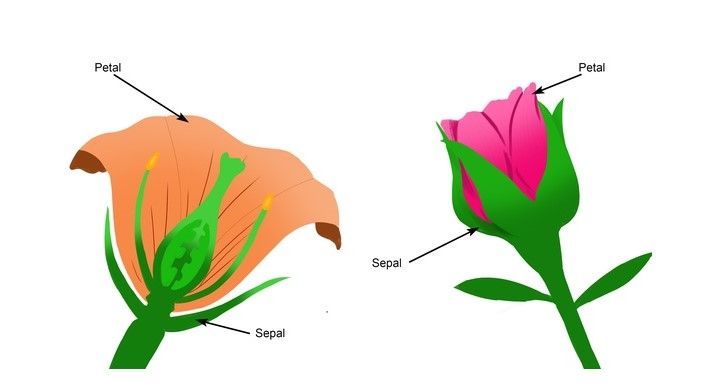

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

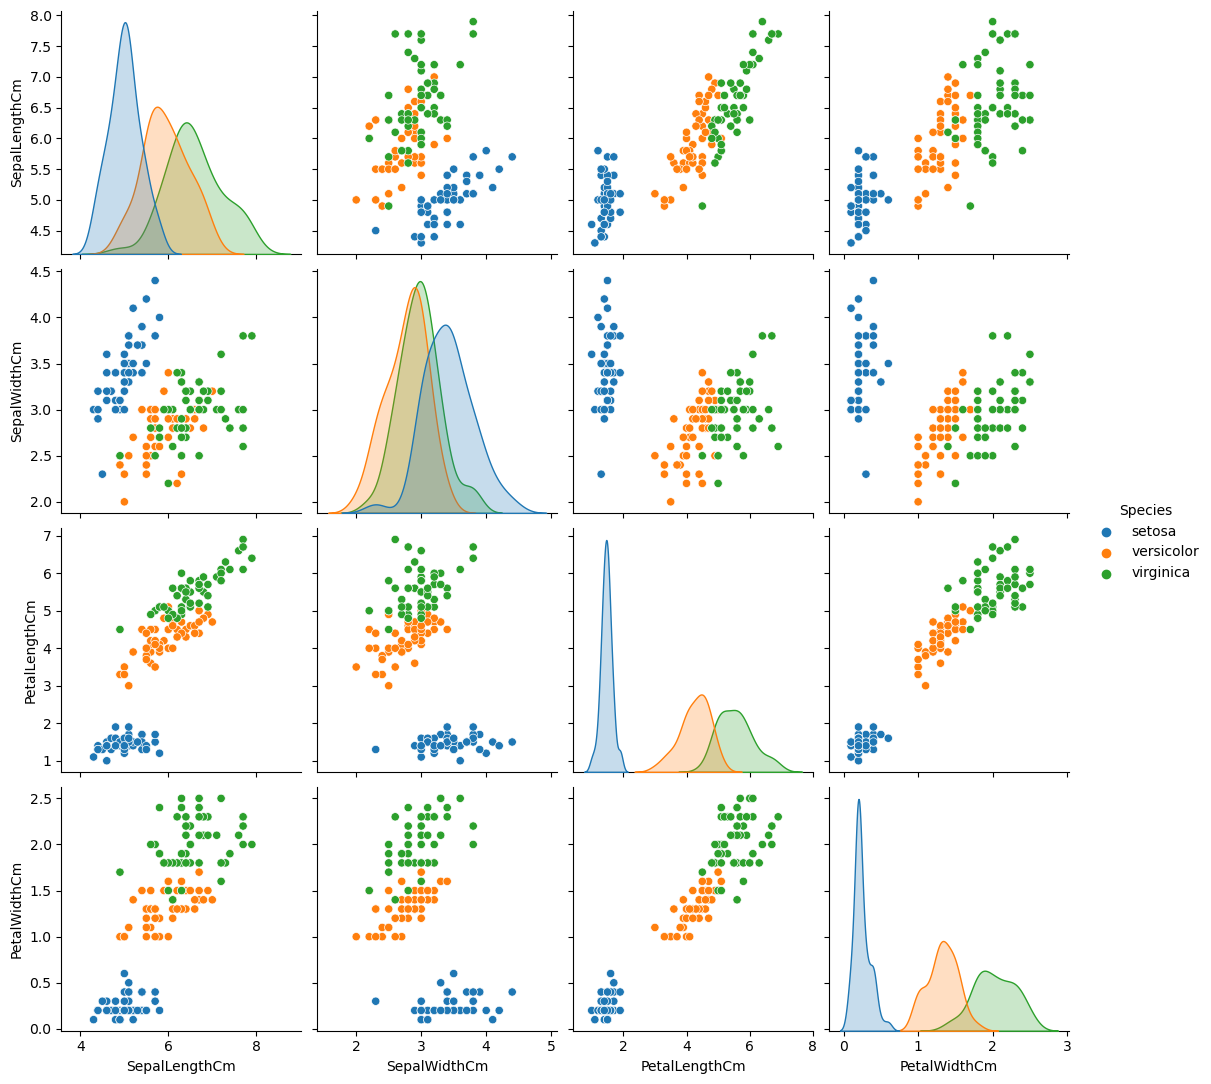

In [8]:
sns.pairplot(df, hue="Species", height = 2.75);

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df["Species_Num"] = df["Species"]

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [14]:
df["Species_Num"] = df["Species_Num"].str.replace("setosa", "1")
df["Species_Num"] = df["Species_Num"].str.replace("versicolor", "2")
df["Species_Num"] = df["Species_Num"].str.replace("virginica", "3")

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [16]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3
149,5.9,3.0,5.1,1.8,virginica,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [18]:
df["Species_Num"] = pd.to_numeric(df["Species_Num"], downcast = "integer")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


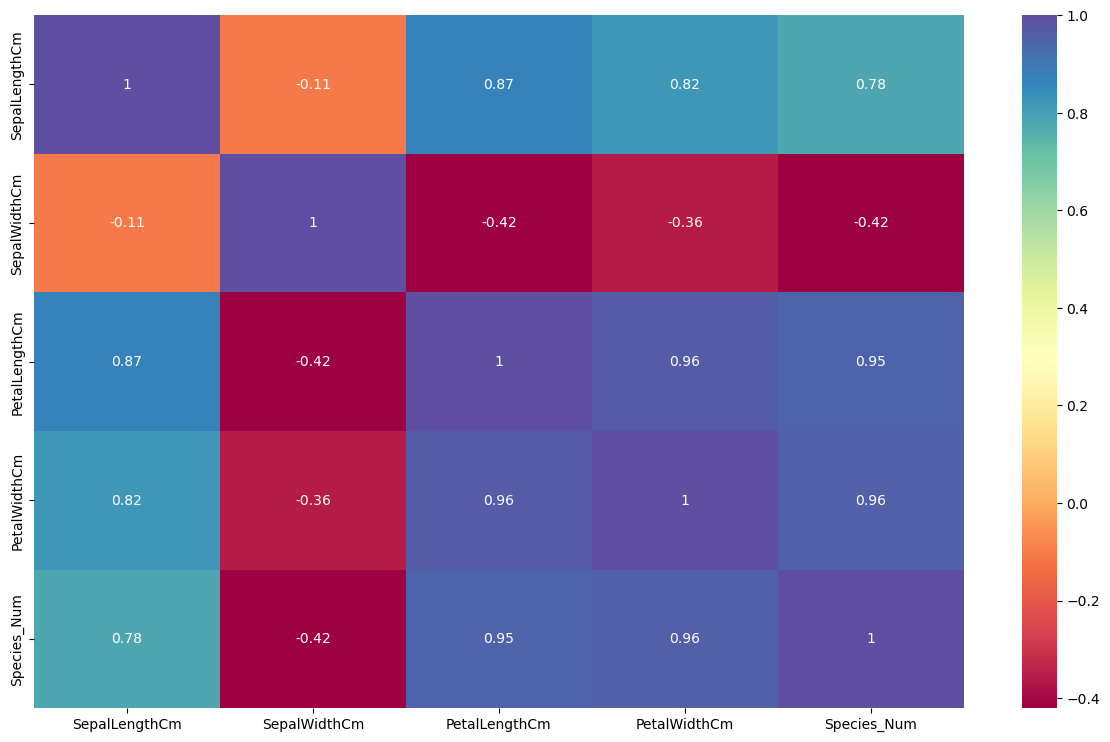

In [20]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Spectral', annot = True);

In [21]:
df.drop(["PetalLengthCm", "Species_Num"], axis = 1, inplace = True)

In [22]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


**Decision Tree Modelling**

In [25]:
X = df.drop(["Species"], axis = 1)
y = df.Species

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt_model = DecisionTreeClassifier()

In [30]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt_model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [33]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cv_scores = cross_val_score(estimator=dt_model, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.8734848484848484

In [36]:
cv_scores

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.81818182, 0.90909091, 0.90909091, 0.90909091, 0.63636364])

In [37]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

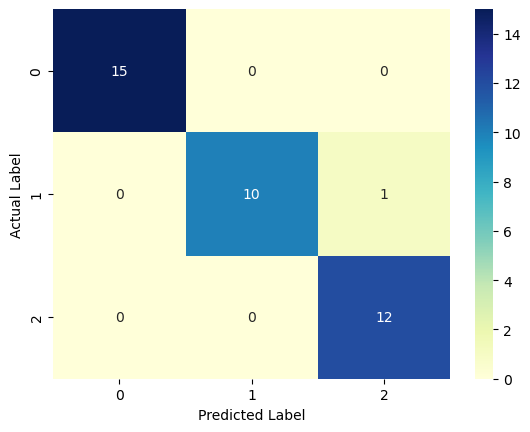

In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [40]:
from sklearn import tree

In [41]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


In [42]:
list(df.columns[:-1])

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']

In [43]:
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica "]
print(features)
print(targets)

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']
['setosa', 'versicolor', 'virginica ']


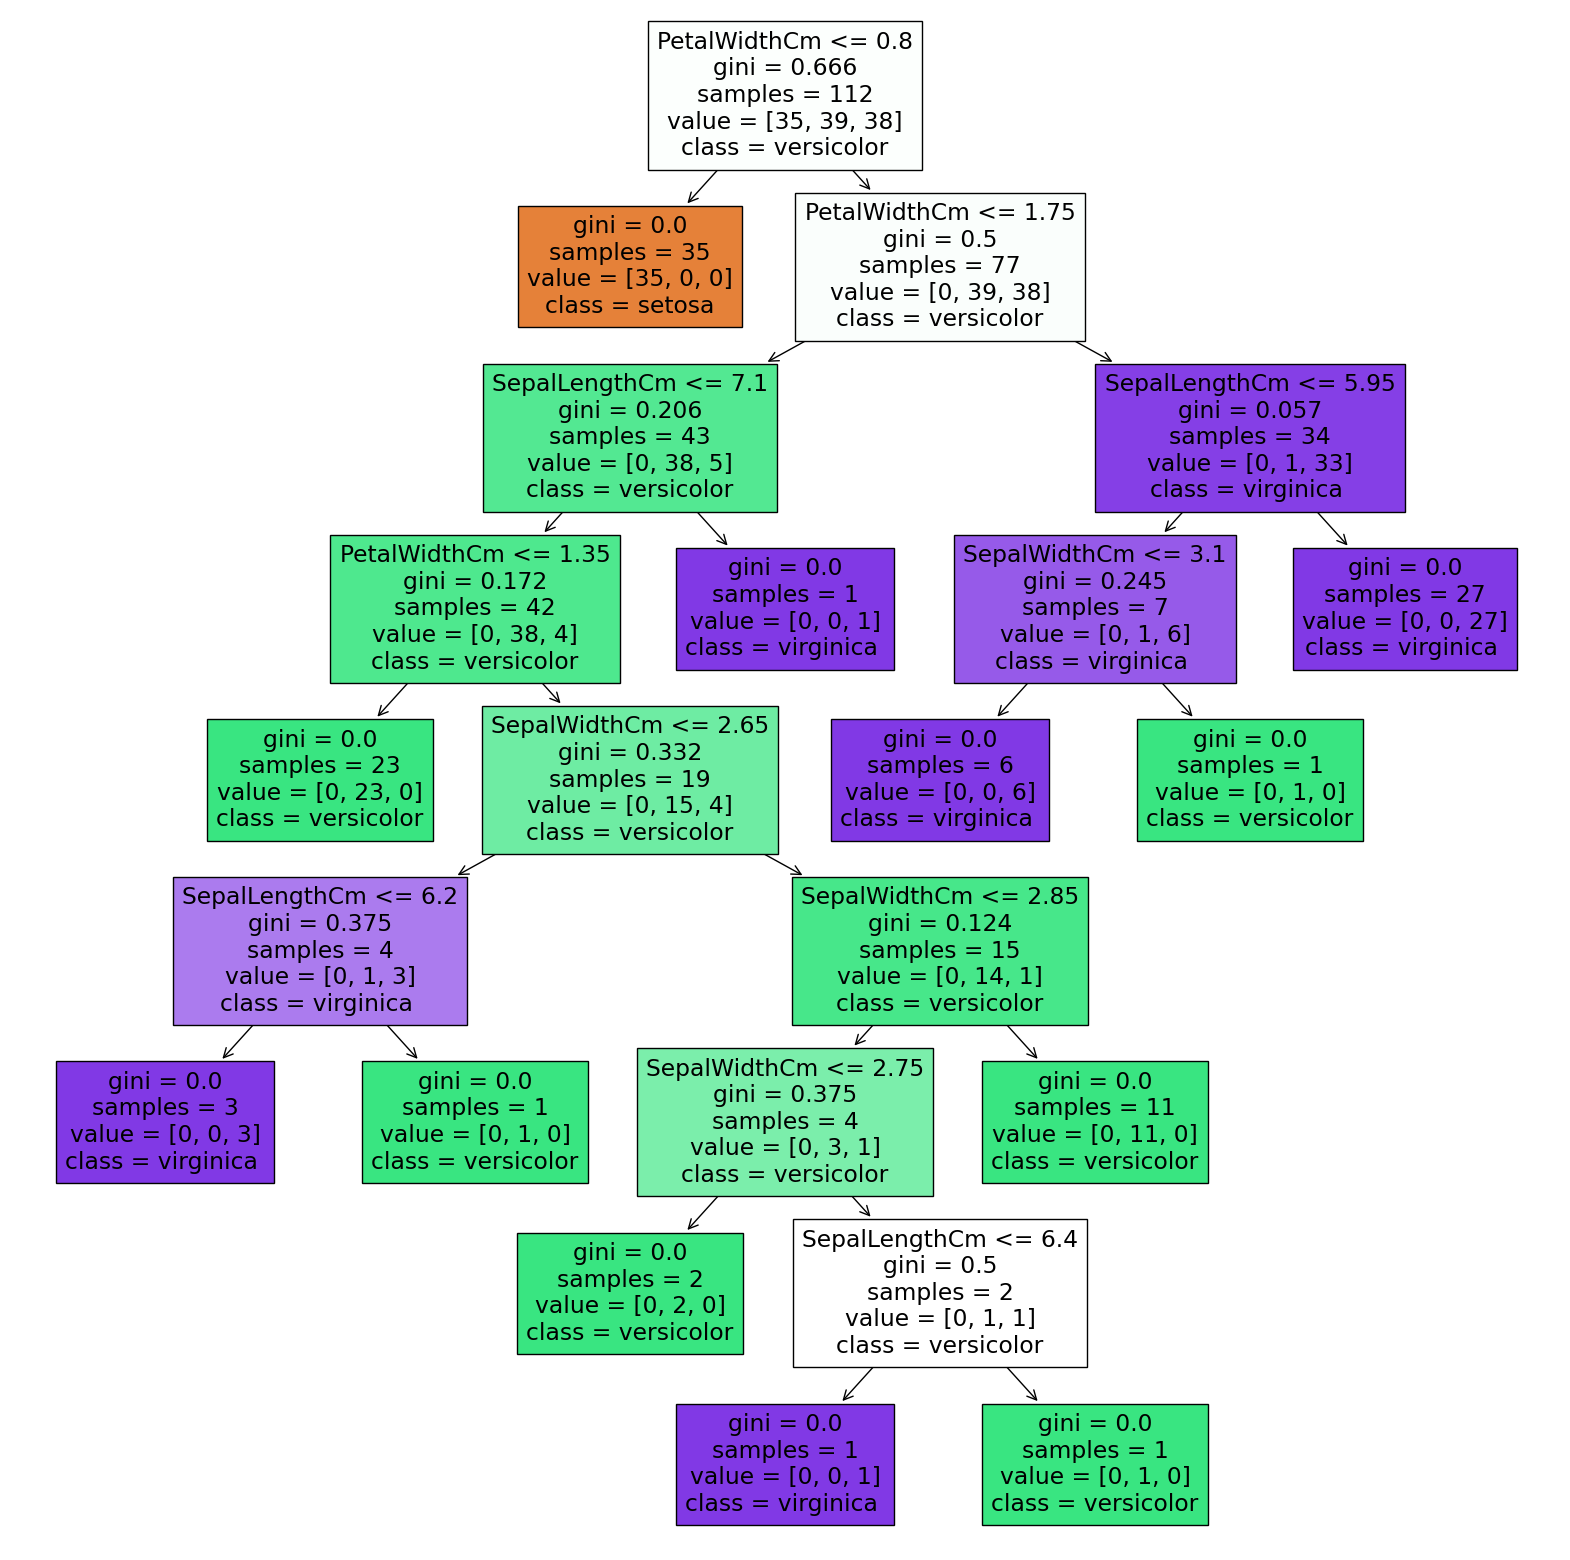

In [44]:
plt.figure(figsize=(20,20)) 
tree2 = tree.plot_tree(dt_model, filled=True, feature_names=features , class_names = targets)

**Hyperparameter Optimization with Python**

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
dt_model2 = DecisionTreeClassifier()

In [47]:
dt_params = {"criterion": ["gini", "entropy"],
              "max_depth" : np.arange(2, 14, 2),
              'max_features': ["auto", "sqrt", "log2"]}

In [48]:
dt_cv_model = GridSearchCV(estimator = dt_model2, param_grid = dt_params, cv = 10)

In [49]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [50]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [51]:
dt_tuned = DecisionTreeClassifier(criterion = "gini", max_depth = 6, max_features = "sqrt")

In [52]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [53]:
y_pred = dt_tuned.predict(X_test)

In [54]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8421052631578947


In [55]:
cv_scores = cross_val_score(estimator = dt_tuned, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.8303030303030303

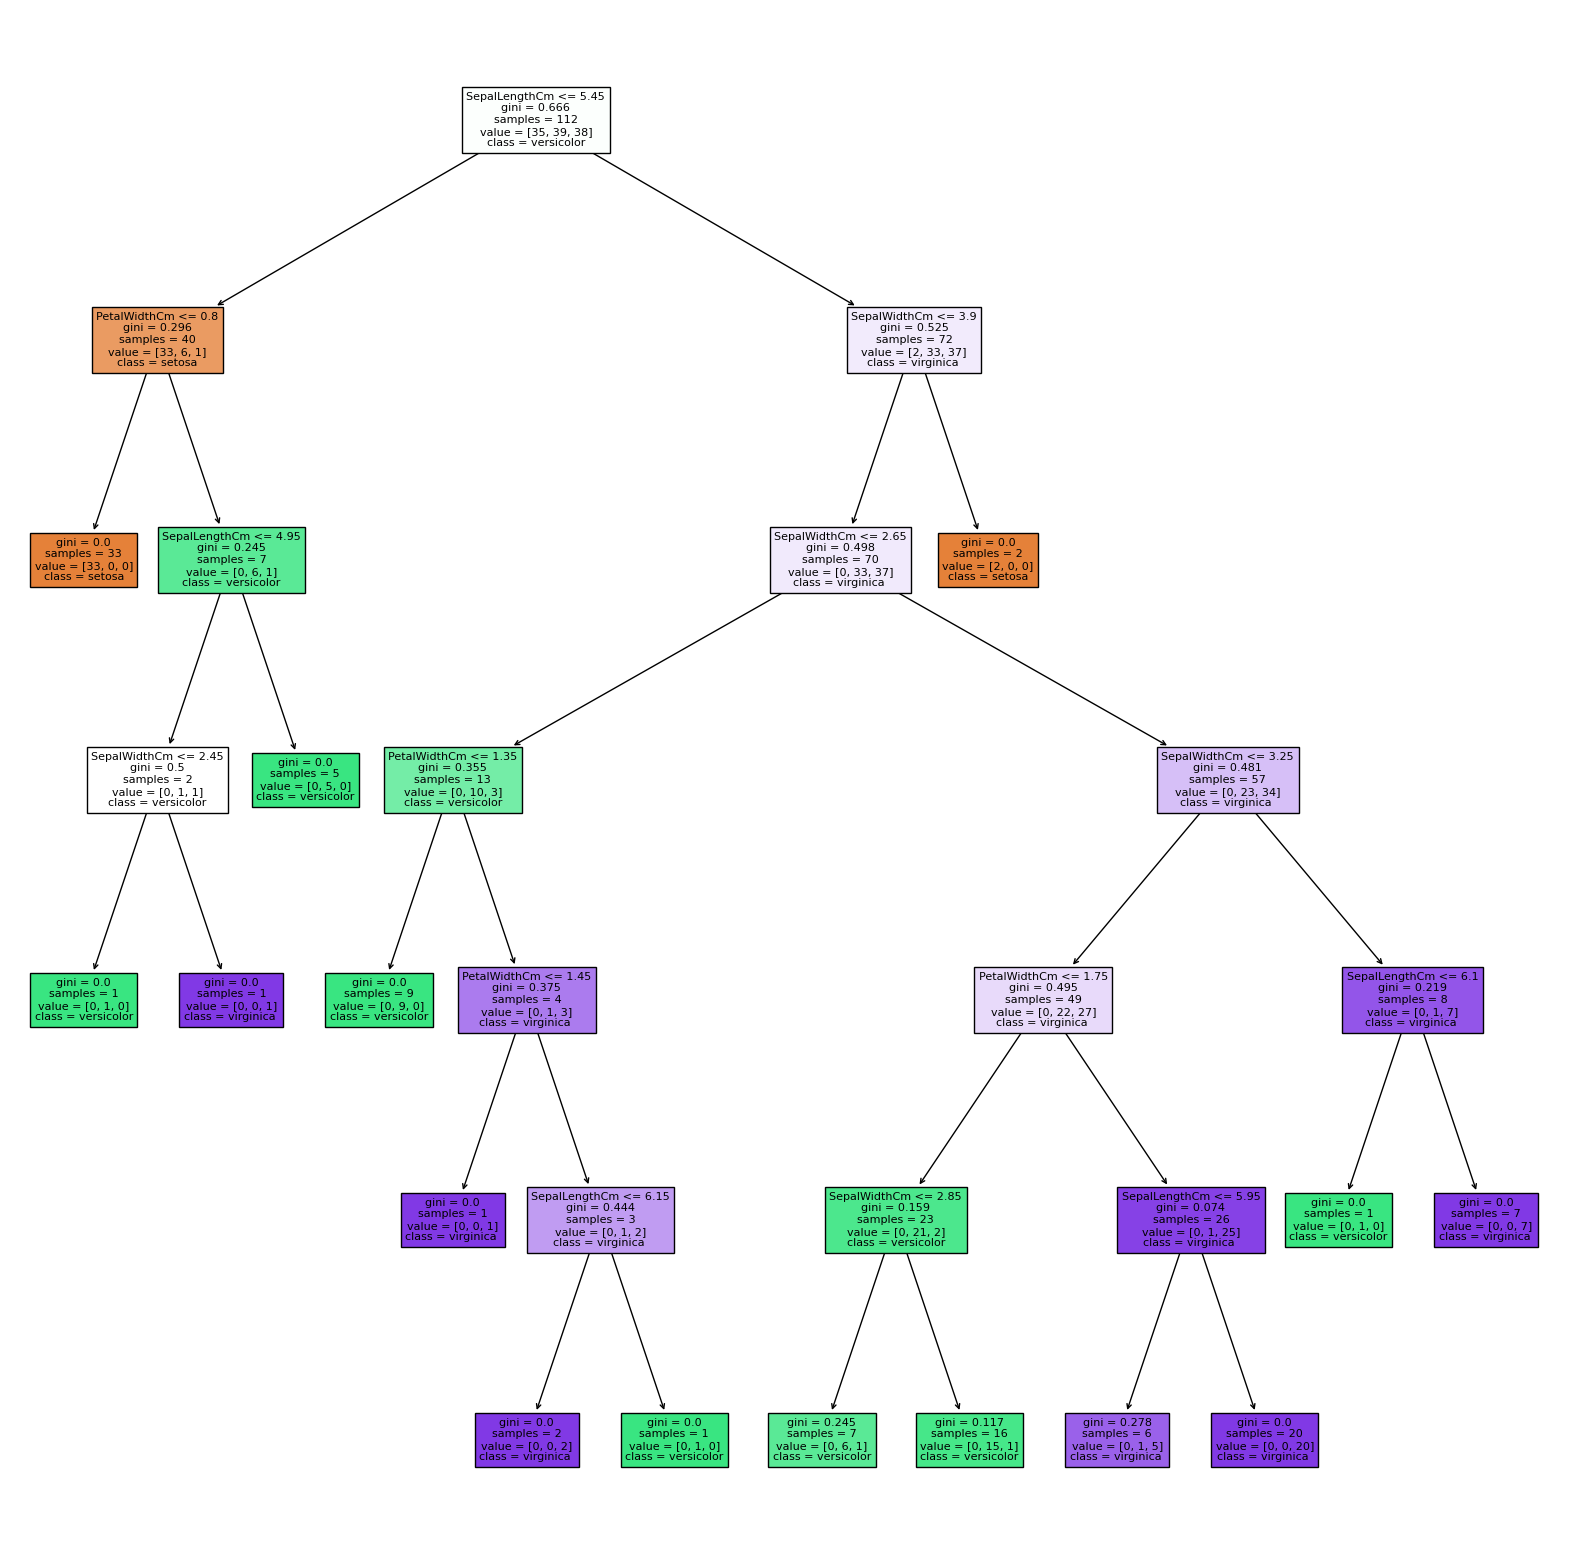

In [56]:
plt.figure(figsize=(20,20)) 
tree2 = tree.plot_tree(dt_tuned, filled=True, feature_names=features , class_names = targets)

**Random Forest Modelling**

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_model = RandomForestClassifier()

In [59]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = rf_model.predict(X_test)

In [61]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [62]:
cv_scores = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.9098484848484848

In [63]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted Label')

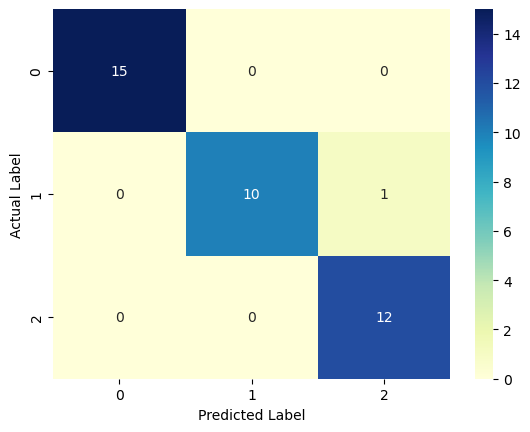

In [64]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [66]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1888903508),
 DecisionTreeClassifier(max_features='sqrt', random_state=120769003),
 DecisionTreeClassifier(max_features='sqrt', random_state=478141967),
 DecisionTreeClassifier(max_features='sqrt', random_state=1845466339),
 DecisionTreeClassifier(max_features='sqrt', random_state=1933192497),
 DecisionTreeClassifier(max_features='sqrt', random_state=1292914944),
 DecisionTreeClassifier(max_features='sqrt', random_state=2024999016),
 DecisionTreeClassifier(max_features='sqrt', random_state=1860236253),
 DecisionTreeClassifier(max_features='sqrt', random_state=133312562),
 DecisionTreeClassifier(max_features='sqrt', random_state=1480213473),
 DecisionTreeClassifier(max_features='sqrt', random_state=2120686284),
 DecisionTreeClassifier(max_features='sqrt', random_state=196047064),
 DecisionTreeClassifier(max_features='sqrt', random_state=1621586329),
 DecisionTreeClassifier(max_features='sqrt', random_state=672192075),
 DecisionTr

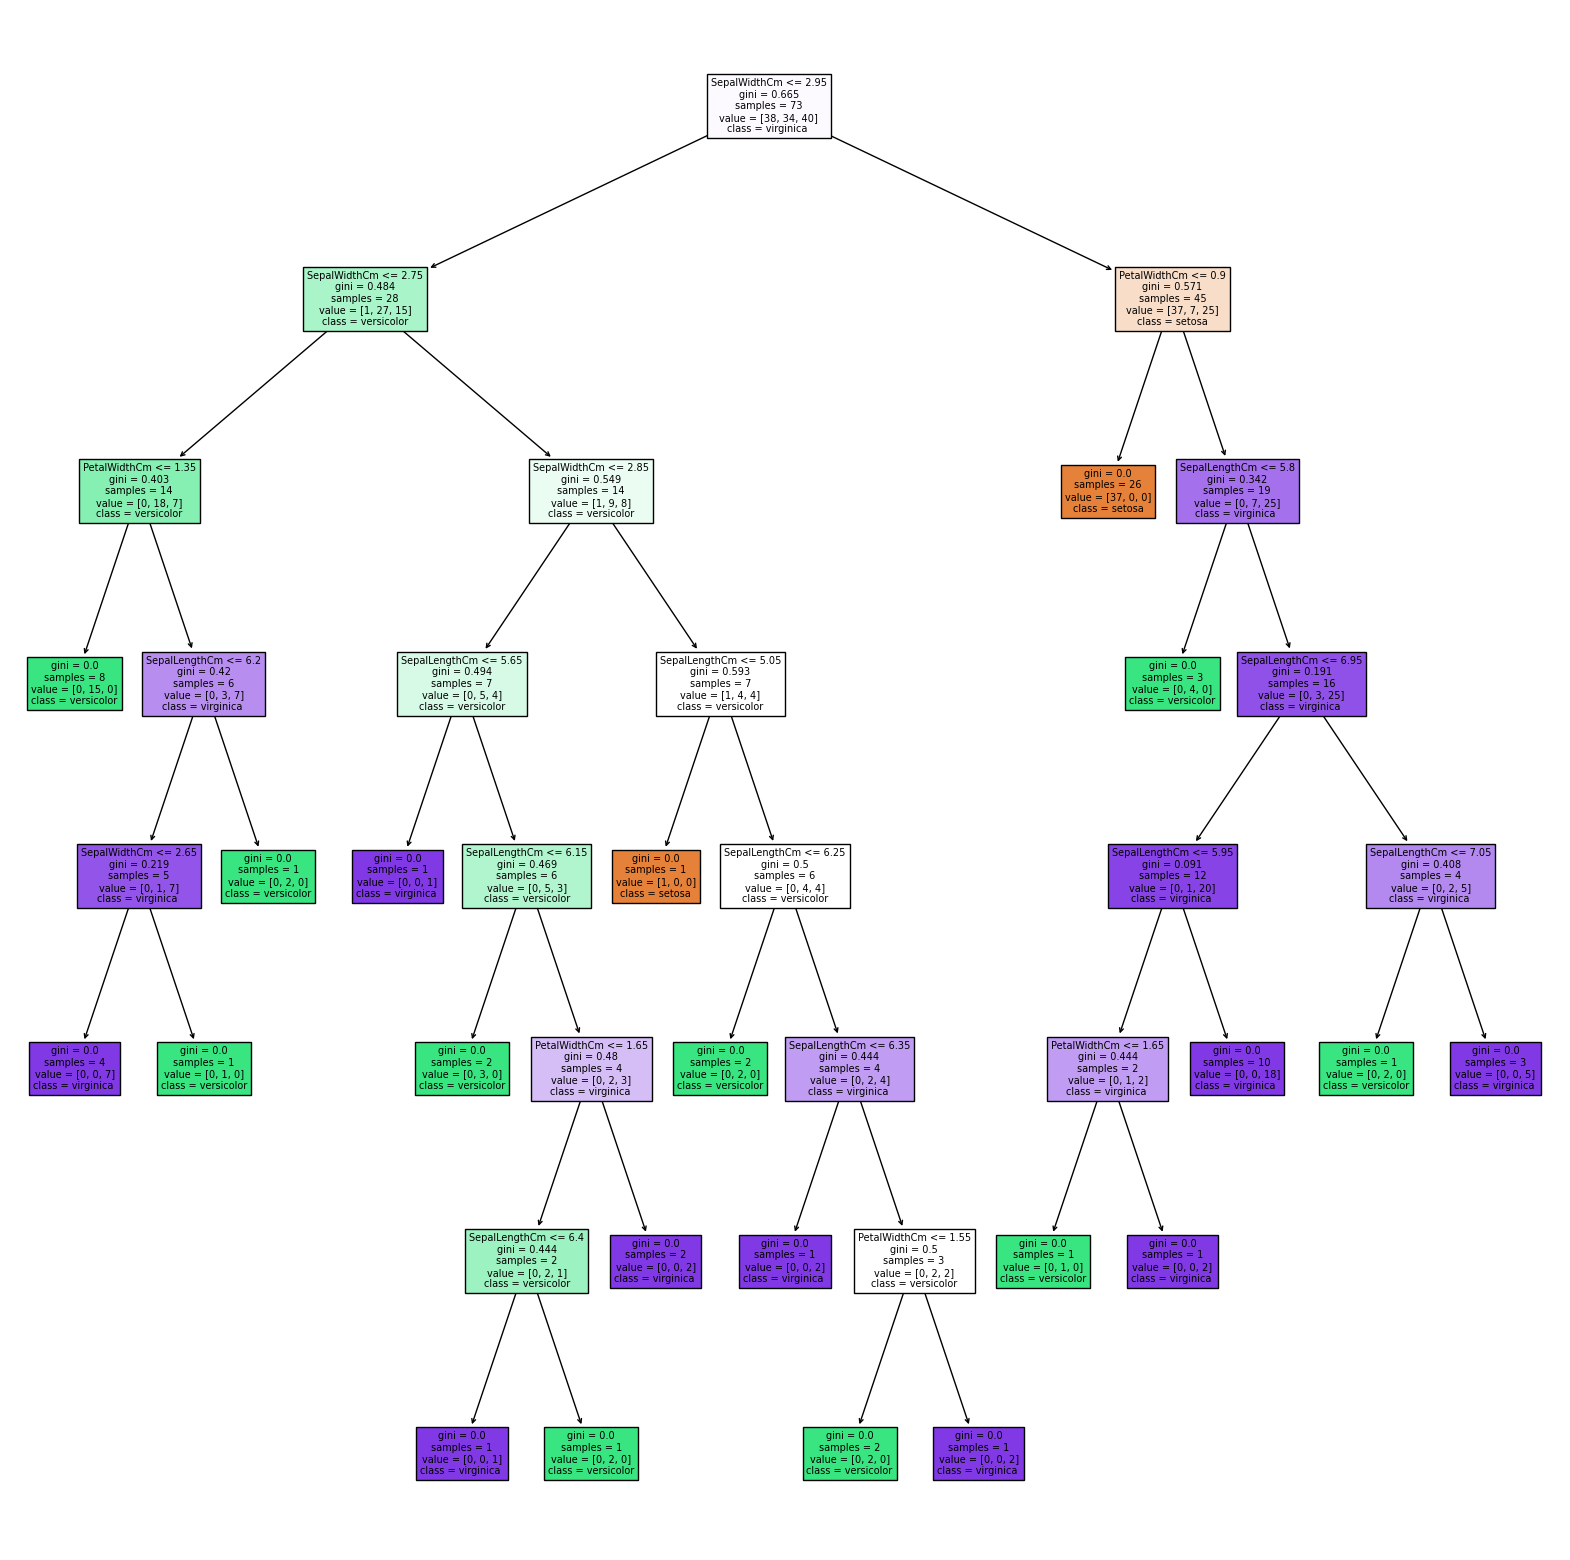

In [67]:
plt.figure(figsize=(20,20)) 
tree2 = tree.plot_tree(rf_model.estimators_[0], filled=True, feature_names=features , class_names = targets)

**Hyperparameter Optimization with Python**

In [68]:
rf_model2 = RandomForestClassifier()

In [69]:
rf_params = {"n_estimators" : [50, 100, 300],
             "max_depth" : [3, 5, 7],
             "max_features" : [2, 4, 6, 8],
             "min_samples_split" : [2, 4, 6] 
            }

In [70]:
rf_cv_model = GridSearchCV(rf_model2, rf_params, cv = 5, n_jobs = -1)

In [71]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

In [72]:
rf_cv_model.best_params_ 

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [73]:
rf_tuned = RandomForestClassifier(max_depth = 3,             
                                  max_features = 2, 
                                  min_samples_split = 2, 
                                  n_estimators = 50)

In [74]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50)

In [75]:
y_pred = rf_tuned.predict(X_test)

In [76]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


In [77]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted Label')

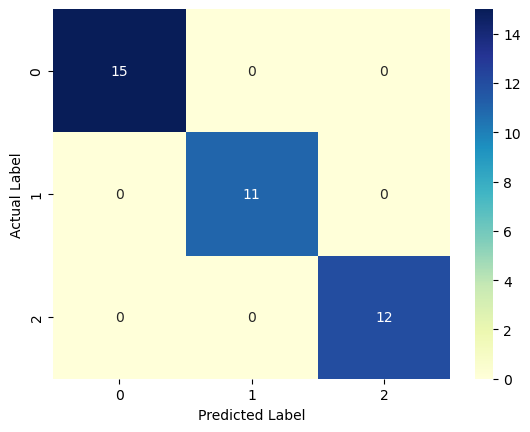

In [78]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [80]:
rf_tuned.feature_importances_

array([0.18156982, 0.05130843, 0.76712176])

In [81]:
X_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'], dtype='object')

In [82]:
best_features = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

In [83]:
best_features

PetalWidthCm     0.767122
SepalLengthCm    0.181570
SepalWidthCm     0.051308
dtype: float64

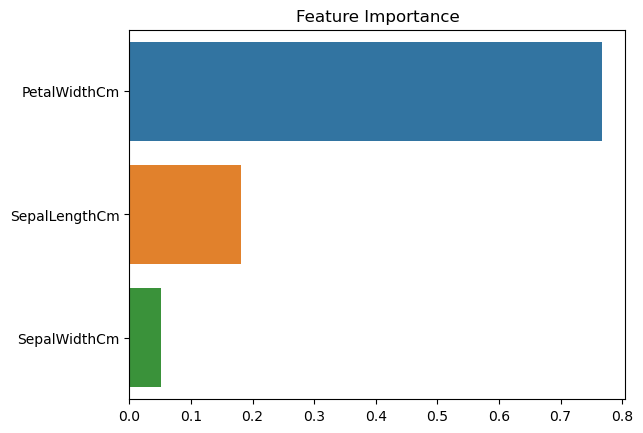

In [84]:
sns.barplot(x = best_features, y = best_features.index)
plt.title("Feature Importance")
plt.show()